Zadanie 1

In [146]:
I = [0 0 0 1 0;
     0 0 0 1 0;
     0 0 0 1 0;
     0 1 0 1 0;
     0 0 1 1 0;
     0 0 0 1 0]

6×5 Array{Int64,2}:
 0  0  0  1  0
 0  0  0  1  0
 0  0  0  1  0
 0  1  0  1  0
 0  0  1  1  0
 0  0  0  1  0

In [86]:
O = [0 1 1 1 1;
     0 1 0 0 1;
     0 1 0 0 1;
     0 1 0 0 1;
     0 1 0 0 1;
     0 1 1 1 1]

6×5 Array{Int64,2}:
 0  1  1  1  1
 0  1  0  0  1
 0  1  0  0  1
 0  1  0  0  1
 0  1  0  0  1
 0  1  1  1  1

In [94]:
function to_bin(i)
    x = string(i,base=2)
end

to_bin (generic function with 1 method)

In [95]:
to_bin(7)

"111"

In [143]:
function wyswietl(liczba)
    macierz = []
    a = [0; 0; 0; 0; 0; 0]
    for i in liczba
        if i == '0'
            macierz = O
        elseif i == '1'
            macierz = I
        end
        a = hcat(a,macierz)
    end
    return a
end

wyswietl (generic function with 1 method)

In [144]:
wyswietl(to_bin(7))

6×16 Array{Int64,2}:
 0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0
 0  0  1  0  1  0  0  1  0  1  0  0  1  0  1  0
 0  0  1  1  0  0  0  1  1  0  0  0  1  1  0  0
 0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0

┌ Info: Saved animation to 
│   fn = C:\Users\julek\wyswietlacz.gif
└ @ Plots C:\Users\julek\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\julek\\wyswietlacz.gif")
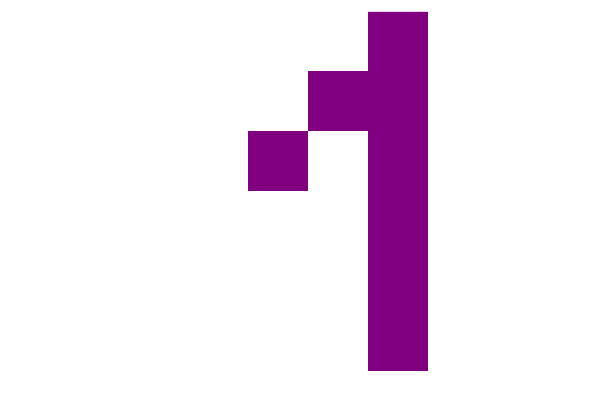

In [148]:
using Plots
an = @animate for i in 1:10
heatmap(wyswietl(to_bin(i)),
aspect_ratio = :equal,
seriescolor = palette([:white,:purple]),
colorbar = :none,
framestyle = :none
)
end
gif(an,"wyswietlacz.gif", fps = 1)

Zadanie 2

In [4]:
#NOT MINE CODE
using Plots

function pathfinder(M)
    
    rows = size(M)[1]
    collumns = size(M)[2]
    C = copy(M)
    
    for i in rows-1:-1:1, k in 1:collumns
        if k==1
            C[i,k]=M[i,k] + minimum(C[i+1, 1:2])
        elseif k == collumns
            C[i,k] = M[i,k] + minimum(C[i+1, k-1:k])
        else
            C[i,k] = M[i,k] + minimum(C[i+1, k-1:k+1])
        end
    end
    
    path = [findmin(C[1,:])[2]]
    for row in 2:rows
        if path[row-1] == 1
            next_index = findmin(C[row,path[row-1]:path[row-1]+1])[2]
            push!(path,path[row-1]+next_index-1)
        elseif path[row-1] == collumns
            next_index = findmin(C[row,path[row-1]-1:path[row-1]])[2]
            push!(path,path[row-1]+next_index-2)
        else
            next_index = findmin(C[row,path[row-1]-1:path[row-1]+1])[2]
            push!(path,path[row-1]+next_index-2)
        end
    end
    
    M = M[end:-1:1,:]
    an = @animate for i in 1:rows
        M[i, path[rows+1-i]] = 0
        heatmap(M, seriescolor = cgrad(:RdGy_10, [0.01]), framestyle =:none, clim =(0,20))
    end
    
    gif(an,"terrain.gif", fps=rows/4)
end

pathfinder (generic function with 1 method)

In [1]:
B = rand(1:20,10,10)

10×10 Array{Int64,2}:
 19   5  12  12  12   2  11  12   9   4
  5   4  12  15   3   6   4  16  14  20
  9   9   6   9  19  14   7  11  17   5
 13   8   9  16   7  14   6  20   7  14
  3  14  16  18   3  13  13  11  15   6
  7   4   6  16  11  12   4   7  10   4
  5   6   7  12   8   6  14   7   5  12
  6   8   5  13  14   8   1  15  17  20
 12   7   5   3   8   9  15  13   7   4
  6  12  13   1  13   2   8   8   2   9

┌ Info: Saved animation to 
│   fn = C:\Users\julek\terrain.gif
└ @ Plots C:\Users\julek\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\julek\\terrain.gif")
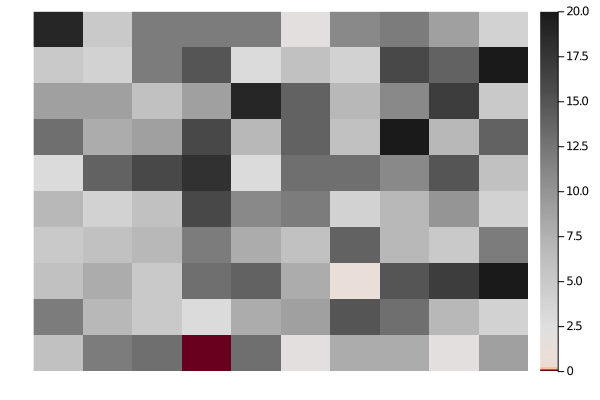

In [5]:
pathfinder(B)

In [6]:
C = rand(1:20,50,50)

50×50 Array{Int64,2}:
  1  17   8  10   4  17   1  20   3  …   1  13  16   7   6  20   3   3   5
  8  13  18   8  13   7   1   3  17     15   8  14  11  20  17  14   9  20
  7  17  11   4  19  12  14  14   6      5   3   4   8  11   7   6  17   4
 13   7   2   1   2   6   4  17  11      5  11  20   8  17  19  14  16   6
  8  19   2   5   4   9  14  20  18     15   8   8   2   7  19  18  20  18
 15  13  17  17  15  16   2   5   9  …  18  12  18  10   3  16  12  13  11
 10  11   6  17   6  14  15  16   6      8   1  10  12   3  17  13   9   6
 18   7  17   2  10   5   7   1   4     18   3  14   6  10  19  14  12   1
 13   1  11   9   2   2   2  16  17     18  11  10   3  18  13  12   1  19
  9   2  10   2  11  19   4  16  18     19  14   2  17  14  17  11   4  12
 12   6   3  14   1  13  20  12  12  …  10   9   8   2   3   2  17  12   5
  5  13  15   5  16   7   6   4   6      4   1  10   9   5   2  16  18  11
 17  11   4   7  14  17  19   2  17      3  12   7   1  14   8  15  10  14
  ⋮

┌ Info: Saved animation to 
│   fn = C:\Users\julek\terrain.gif
└ @ Plots C:\Users\julek\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\julek\\terrain.gif")
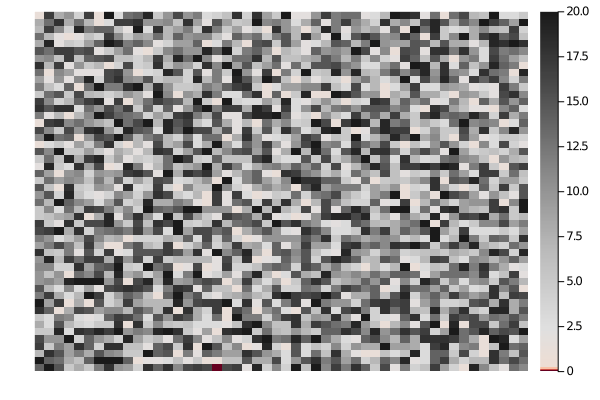

In [7]:
pathfinder(C)

In [8]:
E = rand(1:20, 200,150)

200×150 Array{Int64,2}:
 12   4  14   7   8  16  16  18   6  …  20  14  16   4   5   7   7  17  17
  5   3   5   8  15  11   7  12   7     12  19   3  20  18  17  15  13   4
 20  18  16   7   1  12  16  17  18     15   2  17   1   3  15  11  14  17
 13  11  11  20   7   2  17  16  13     20  15   8  12   8  13   7   6  18
 13  11   5  10   3  12   3  16   9     13  19   8   8  14   2   2   8  17
 11   6   4  18  13  10   6   3  18  …  13   4  16   8  12   3   3  12   2
 11  16  20  19   6  14   1  11  10     11   4  16   7  12  16  15  17  12
  3   5  20   7  14  19   8   6   5     15  15  17  11   9   7  14   7  16
  6  10   4  11   1   4  14   3  10      3   3  13   6  13  16  10   1   7
 10   8  13   2  13  15   9  12  16      3   8  19   4   5  14   2  10  10
 15   3   1   1   4   2  13  18  13  …  11  10   2   8  16  20   3   1  17
  4  10  11  12  11  16  13  12   5      5   5   2  18   4  15  15  14   9
  2  11   9  18  20  20  16   2   4     20  18   6  18  19  17  16  13  14
 

┌ Info: Saved animation to 
│   fn = C:\Users\julek\terrain.gif
└ @ Plots C:\Users\julek\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\julek\\terrain.gif")
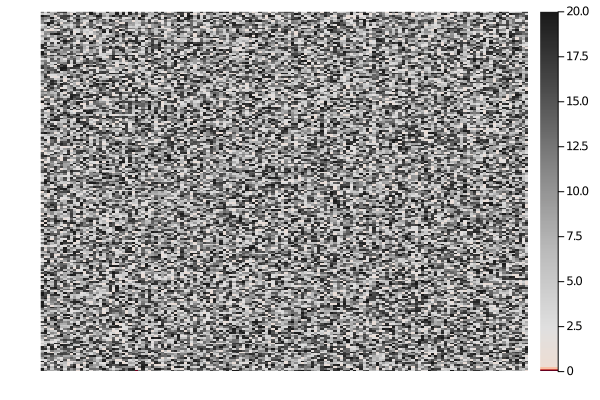

In [9]:
pathfinder(E)

Zadanie 3

In [8]:
using LinearAlgebra, Plots

In [37]:
A = Matrix{Float64}(rand(0.5:6.5, 5, 5))
x = rand(0.5:6, 5,1)

5×1 Array{Float64,2}:
 4.5
 5.5
 5.5
 3.5
 5.5

In [38]:
y = A*x

5×1 Array{Float64,2}:
 112.25
  86.75
  83.25
  88.75
  85.25

In [39]:
cond(A)

31.362463970741203

In [40]:
A\y

5×1 Array{Float64,2}:
 4.499999999999999
 5.500000000000001
 5.499999999999998
 3.499999999999999
 5.5

In [52]:
function rand_matrix(typ, pocz_prz,kon_prz, n, m, ile)
    conds = []
    niedokladnosci = [ ]
    for i in 1:ile
        A = typ.(rand(pocz_prz:kon_prz, n,m))
        x = rand(pocz_prz:kon_prz, m, 1)
        y = A*x
        rozwiazanie = inv(A)*y
        niedokladnosc = sum(abs.(x-rozwiazanie))/m
        c = cond(Float64.(A))
        append!(conds,c)
        append!(niedokladnosci, niedokladnosc)
    end
    scatter(conds,niedokladnosci) |> display
end

rand_matrix (generic function with 1 method)

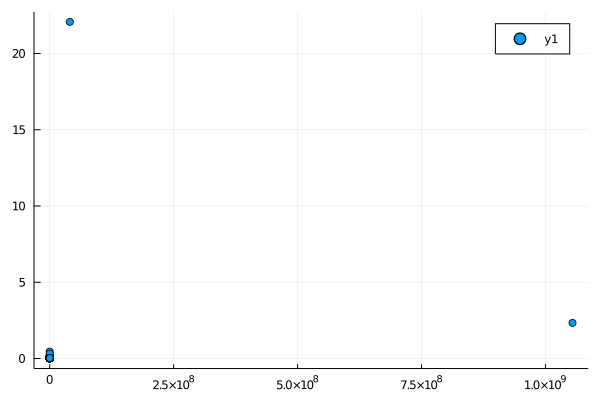

In [44]:
rand_matrix(Float16, 0.5, 3, 8, 8, 100)

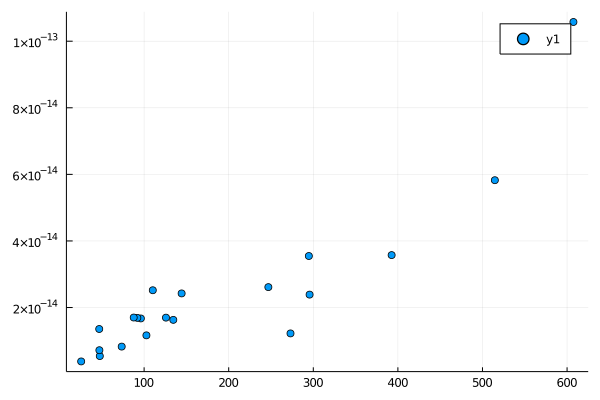

In [10]:
rand_matrix(Float64, 0.3, 8, 13, 13, 20)

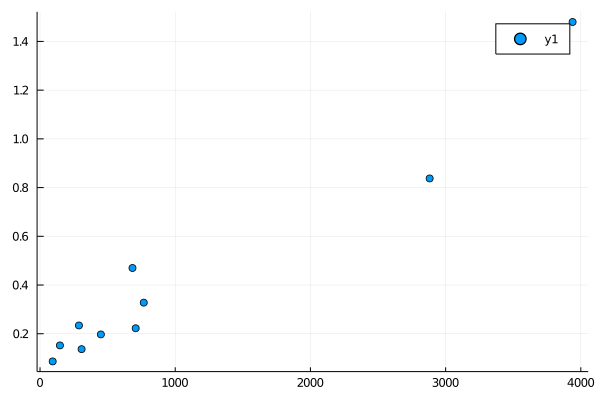

In [45]:
rand_matrix(Float16, 0.5, 3, 30, 30, 10)

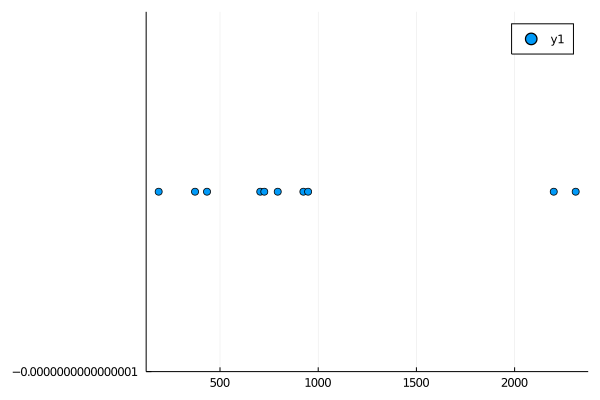

In [53]:
rand_matrix(BigFloat, 0.5, 3, 30, 30, 10)

In [12]:
function hilb(n)
    H = zeros(n,n)
    for i in 1:n
        for j in 1:n
            H[i,j] = 1/(i+j-1)
        end
    end
    return H
end

hilb (generic function with 1 method)

In [47]:
y = hilb(50) * (1:50)

50-element Array{Float64,1}:
 50.0
 46.4811868185333
 43.923912098605115
 41.82926437432274
 40.03161175835625
 38.44860560703623
 37.03118387130062
 35.74690749897353
 34.57282039291555
 33.49188056914864
 32.490978410165155
 31.559748382329225
 30.689813484535097
  ⋮
 18.371782111336774
 18.101258340759895
 17.83889744351442
 17.584320429052834
 17.337172358923688
 17.097120395119262
 16.863852042111137
 16.63707355981462
 16.4165085278105
 16.201896543766942
 15.992992041224422
 15.789563213800434

In [48]:
hilb(50)\y


50-element Array{Float64,1}:
      0.999916487996839
      2.0125091121746697
      2.5487094409930737
     10.718964883246699
    -44.44554809154259
    189.2524314980249
   -238.29229265548207
   -524.0958610408496
   2678.3810328214854
  -4748.000853663063
   5517.832553114151
  -5383.218170250126
   1816.081412448067
      ⋮
  -3990.0645476733284
  -3796.267730284727
  -3151.0490720993016
   9938.999419131138
   5956.490279799679
  -8081.4277538217475
    382.0136679442499
 -11249.279138978129
  12186.058702456101
   3681.571864121441
  -7043.691922093903
   1882.4708625718606

In [8]:
cond(hilb(100))

2.4064588368328494e20

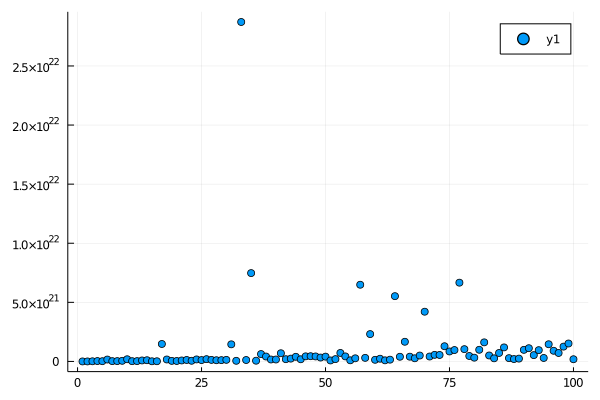

In [13]:
h = [cond(hilb(n)) for n in 1:10:1000]
scatter(h)

Zadanie3b

In [63]:
using StaticArrays, SparseArrays, BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278


In [86]:
A = rand(10,10)
x = 1:10
y = A*x

10-element Array{Float64,1}:
 28.10009184479741
 18.706534608620203
 22.58606842653626
 21.307460806393262
 38.26578166023708
 18.452979185838846
 32.2074416680279
 28.913518714172053
 27.93875169876017
 34.43630902351683

In [90]:
A2 = SMatrix{10,10}(A)
y2 = SVector{10}(y)

10-element SArray{Tuple{10},Float64,1,10} with indices SOneTo(10):
 28.10009184479741
 18.706534608620203
 22.58606842653626
 21.307460806393262
 38.26578166023708
 18.452979185838846
 32.2074416680279
 28.913518714172053
 27.93875169876017
 34.43630902351683

In [92]:
@btime A2\y2

  650.000 ns (1 allocation: 96 bytes)


10-element SArray{Tuple{10},Float64,1,10} with indices SOneTo(10):
 0.9999999999999989
 1.9999999999999907
 3.0000000000000013
 3.9999999999999987
 5.0000000000000036
 6.000000000000008
 7.00000000000001
 8.000000000000002
 9.000000000000002
 9.999999999999984

In [98]:
x2 = SVector{10}(x)
y2 = A2*x2

10-element SArray{Tuple{10},Float64,1,10} with indices SOneTo(10):
 28.10009184479741
 18.706534608620203
 22.58606842653626
 21.30746080639326
 38.26578166023708
 18.452979185838846
 32.2074416680279
 28.913518714172053
 27.93875169876017
 34.43630902351683

In [94]:
@benchmark A*x

BenchmarkTools.Trial: 
  memory estimate:  160 bytes
  allocs estimate:  1
  --------------
  minimum time:     155.479 ns (0.00% GC)
  median time:      374.144 ns (0.00% GC)
  mean time:        366.151 ns (4.60% GC)
  maximum time:     37.666 μs (98.93% GC)
  --------------
  samples:          10000
  evals/sample:     292

In [99]:
@benchmark A2*x2

BenchmarkTools.Trial: 
  memory estimate:  96 bytes
  allocs estimate:  1
  --------------
  minimum time:     44.299 ns (0.00% GC)
  median time:      79.616 ns (0.00% GC)
  mean time:        108.029 ns (11.33% GC)
  maximum time:     12.819 μs (98.77% GC)
  --------------
  samples:          10000
  evals/sample:     991

In [96]:
@benchmark A\y

BenchmarkTools.Trial: 
  memory estimate:  1.19 KiB
  allocs estimate:  3
  --------------
  minimum time:     135.200 μs (0.00% GC)
  median time:      192.600 μs (0.00% GC)
  mean time:        221.482 μs (0.00% GC)
  maximum time:     1.439 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [97]:
@benchmark A2\y2

BenchmarkTools.Trial: 
  memory estimate:  96 bytes
  allocs estimate:  1
  --------------
  minimum time:     776.744 ns (0.00% GC)
  median time:      1.306 μs (0.00% GC)
  mean time:        1.372 μs (0.97% GC)
  maximum time:     134.190 μs (98.88% GC)
  --------------
  samples:          10000
  evals/sample:     86

In [62]:
P = zeros(500,500)
for k in eachindex(P)
    if rand()<0.01
        P[k] = rand()
    end
end

In [69]:
x = 1:500
y=P*x
P3=sparse(P)
@benchmark P*x

BenchmarkTools.Trial: 
  memory estimate:  4.06 KiB
  allocs estimate:  1
  --------------
  minimum time:     50.700 μs (0.00% GC)
  median time:      88.300 μs (0.00% GC)
  mean time:        95.440 μs (0.00% GC)
  maximum time:     424.700 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [70]:
@benchmark P3*x

BenchmarkTools.Trial: 
  memory estimate:  4.06 KiB
  allocs estimate:  1
  --------------
  minimum time:     2.108 ms (0.00% GC)
  median time:      3.522 ms (0.00% GC)
  mean time:        3.616 ms (0.00% GC)
  maximum time:     6.433 ms (0.00% GC)
  --------------
  samples:          1378
  evals/sample:     1

In [71]:
@benchmark P3*sparse(x)

BenchmarkTools.Trial: 
  memory estimate:  42.81 KiB
  allocs estimate:  15
  --------------
  minimum time:     6.901 μs (0.00% GC)
  median time:      16.000 μs (0.00% GC)
  mean time:        36.164 μs (18.34% GC)
  maximum time:     14.766 ms (99.80% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [75]:
@benchmark P .+ 2 .*P

BenchmarkTools.Trial: 
  memory estimate:  1.91 MiB
  allocs estimate:  6
  --------------
  minimum time:     429.900 μs (0.00% GC)
  median time:      713.500 μs (0.00% GC)
  mean time:        939.415 μs (20.52% GC)
  maximum time:     11.667 ms (93.28% GC)
  --------------
  samples:          5249
  evals/sample:     1

In [78]:
@benchmark P3 .+ 2 .* P3

BenchmarkTools.Trial: 
  memory estimate:  80.08 KiB
  allocs estimate:  10
  --------------
  minimum time:     19.200 μs (0.00% GC)
  median time:      47.500 μs (0.00% GC)
  mean time:        53.182 μs (17.58% GC)
  maximum time:     14.005 ms (99.42% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [83]:
@benchmark P^3

BenchmarkTools.Trial: 
  memory estimate:  3.81 MiB
  allocs estimate:  4
  --------------
  minimum time:     7.903 ms (0.00% GC)
  median time:      8.306 ms (0.00% GC)
  mean time:        9.003 ms (4.03% GC)
  maximum time:     20.416 ms (46.17% GC)
  --------------
  samples:          554
  evals/sample:     1

In [84]:
@benchmark P3^3

BenchmarkTools.Trial: 
  memory estimate:  1.03 MiB
  allocs estimate:  13
  --------------
  minimum time:     1.318 ms (0.00% GC)
  median time:      2.642 ms (0.00% GC)
  mean time:        2.690 ms (2.86% GC)
  maximum time:     9.269 ms (68.34% GC)
  --------------
  samples:          1840
  evals/sample:     1

Zadanie 4

In [11]:
using Images, ImageMagick, TestImages, Plots

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278
┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1278


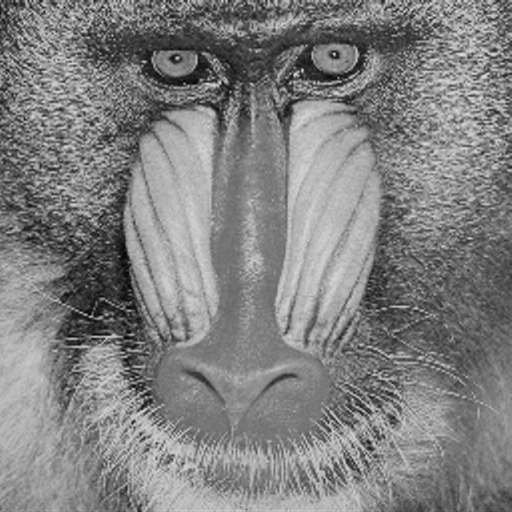

In [12]:
image = testimage("mandril_gray")

In [13]:
I = Float64.(image)

512×512 Array{Float64,2}:
 0.478431   0.298039  0.129412  0.223529  …  0.568627  0.619608  0.639216
 0.454902   0.301961  0.156863  0.239216     0.545098  0.584314  0.6
 0.364706   0.298039  0.239216  0.286275     0.454902  0.427451  0.427451
 0.270588   0.317647  0.372549  0.360784     0.360784  0.290196  0.27451
 0.290196   0.407843  0.513725  0.423529     0.352941  0.427451  0.447059
 0.317647   0.47451   0.615686  0.470588  …  0.392157  0.596078  0.643137
 0.219608   0.392157  0.552941  0.447059     0.505882  0.556863  0.572549
 0.121569   0.278431  0.435294  0.407843     0.584314  0.470588  0.447059
 0.121569   0.188235  0.290196  0.4          0.462745  0.384314  0.364706
 0.14902    0.137255  0.180392  0.392157     0.305882  0.313725  0.313725
 0.141176   0.164706  0.211765  0.321569  …  0.258824  0.266667  0.270588
 0.129412   0.215686  0.301961  0.258824     0.278431  0.278431  0.278431
 0.0980392  0.235294  0.352941  0.25098      0.403922  0.407843  0.411765
 ⋮                

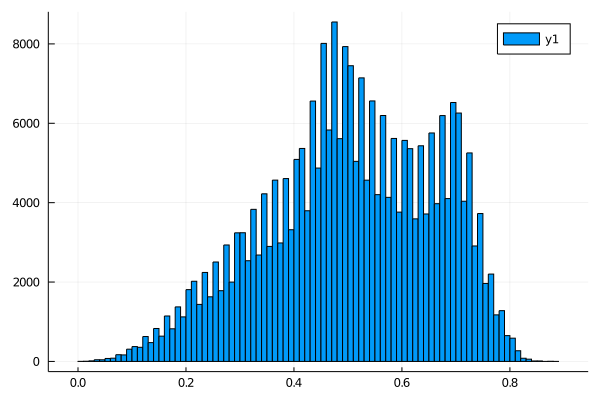

In [14]:
histogram(I[:])

In [20]:
X = Float64.(image)

512×512 Array{Float64,2}:
 0.478431   0.298039  0.129412  0.223529  …  0.568627  0.619608  0.639216
 0.454902   0.301961  0.156863  0.239216     0.545098  0.584314  0.6
 0.364706   0.298039  0.239216  0.286275     0.454902  0.427451  0.427451
 0.270588   0.317647  0.372549  0.360784     0.360784  0.290196  0.27451
 0.290196   0.407843  0.513725  0.423529     0.352941  0.427451  0.447059
 0.317647   0.47451   0.615686  0.470588  …  0.392157  0.596078  0.643137
 0.219608   0.392157  0.552941  0.447059     0.505882  0.556863  0.572549
 0.121569   0.278431  0.435294  0.407843     0.584314  0.470588  0.447059
 0.121569   0.188235  0.290196  0.4          0.462745  0.384314  0.364706
 0.14902    0.137255  0.180392  0.392157     0.305882  0.313725  0.313725
 0.141176   0.164706  0.211765  0.321569  …  0.258824  0.266667  0.270588
 0.129412   0.215686  0.301961  0.258824     0.278431  0.278431  0.278431
 0.0980392  0.235294  0.352941  0.25098      0.403922  0.407843  0.411765
 ⋮                

In [21]:
X += rand((-2.5,0,0,5), size(I))

512×512 Array{Float64,2}:
  0.478431   -2.20196    0.129412  …   0.568627   0.619608   0.639216
  5.4549     -2.19804    5.15686       5.5451     0.584314  -1.9
  0.364706    0.298039   0.239216     -2.0451     5.42745    0.427451
  0.270588    0.317647  -2.12745       0.360784  -2.2098    -2.22549
  5.2902      5.40784    0.513725      0.352941   0.427451   5.44706
  0.317647    0.47451    0.615686  …  -2.10784    5.59608    5.64314
  0.219608    0.392157   5.55294       5.50588    0.556863   0.572549
  5.12157     0.278431   0.435294      0.584314   5.47059    0.447059
  0.121569    0.188235   5.2902        0.462745   5.38431   -2.13529
 -2.35098     5.13725    0.180392      5.30588    0.313725   0.313725
  0.141176   -2.33529    5.21176   …   0.258824   0.266667  -2.22941
  0.129412    5.21569    0.301961      0.278431   5.27843   -2.22157
  0.0980392   5.23529    5.35294      -2.09608    0.407843   0.411765
  ⋮                                ⋱              ⋮         
  5.55686    -

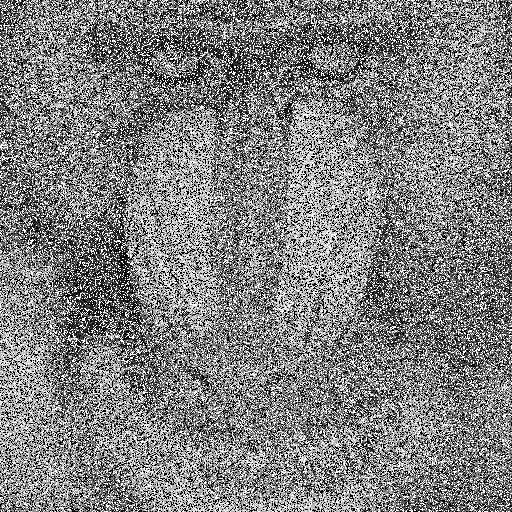

In [22]:
Gray.(X)

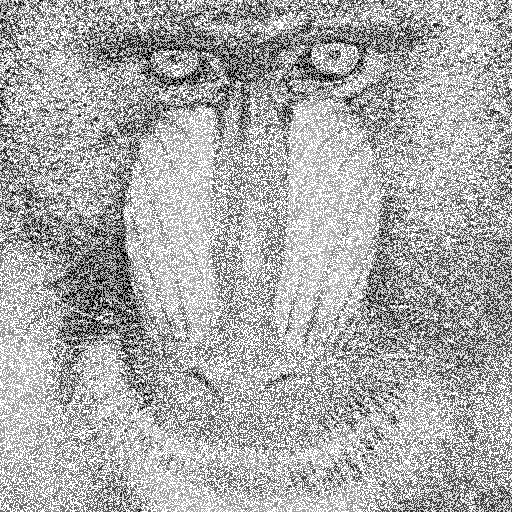

In [20]:
J = Float64.(image)
J += rand((-0.1, 0.5), size(J))
Gray.(J)

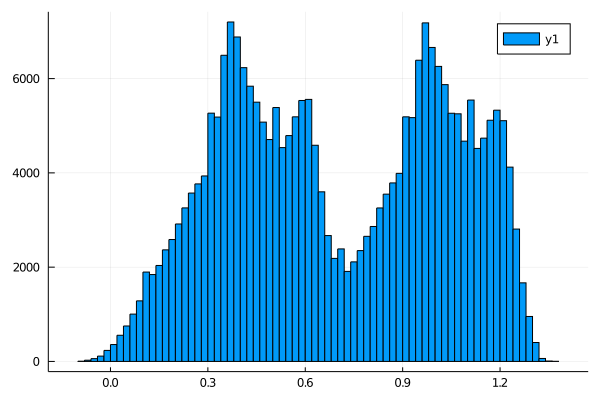

In [21]:
histogram(J[:])

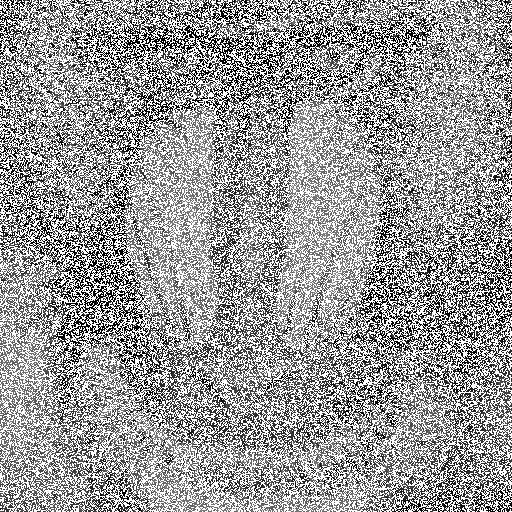

In [22]:
M = Float64.(image)
M += rand((-0.3, 3), size(M))
Gray.(M)

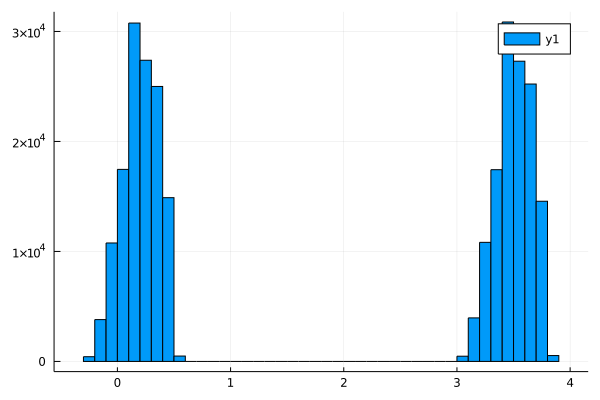

In [23]:
histogram(M[:])

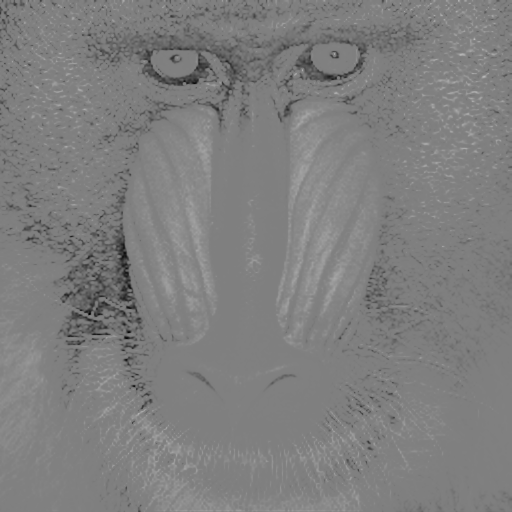

In [24]:
G = Float64.(image)
G .= 4 .*(G .- 0.5) .^3 .+ 0.5
Gray.(G)

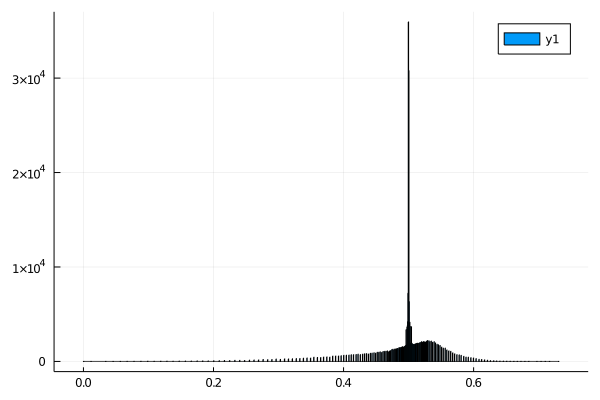

In [25]:
histogram(G[:])

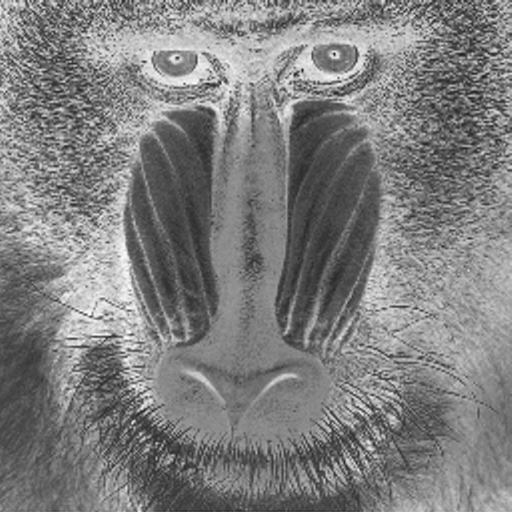

In [26]:
E = Float64.(image)
E .= (1 .- E)
Gray.(E)

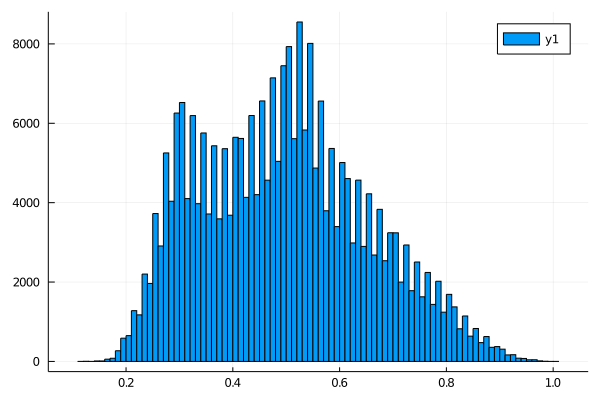

In [27]:
histogram(E[:])

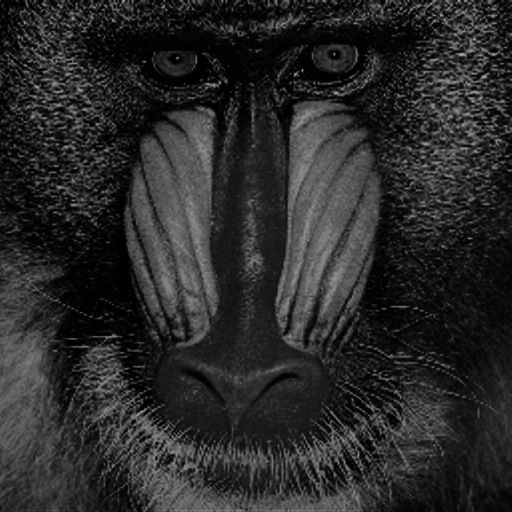

In [28]:
P = Float64.(image)
P = P .^3
Gray.(P)

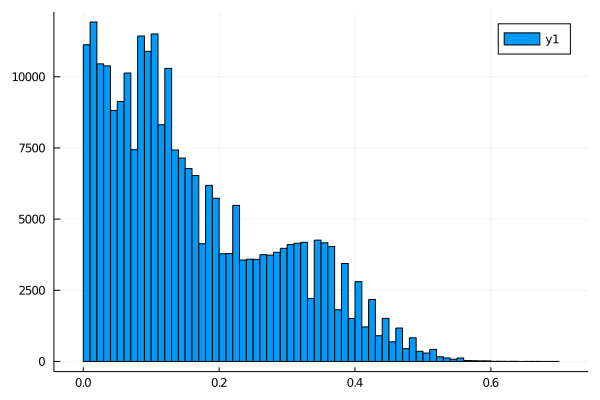

In [29]:
histogram(P[:])

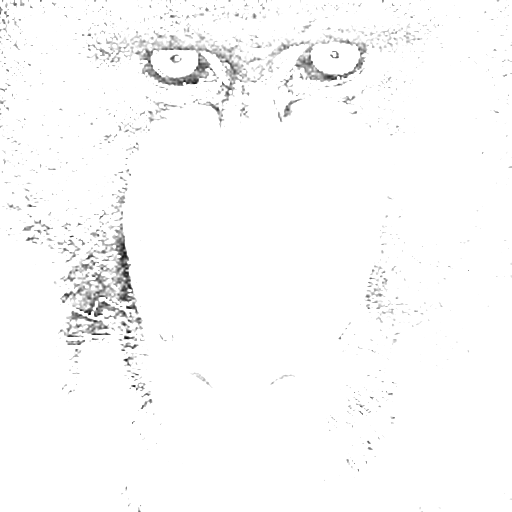

In [30]:
S = Float64.(image)
S = S.*4
Gray.(S)

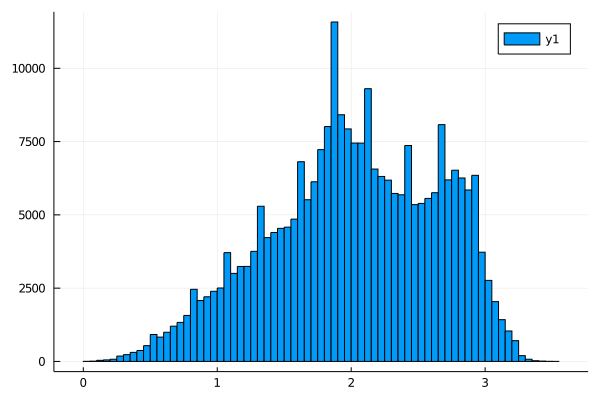

In [31]:
histogram(S[:])

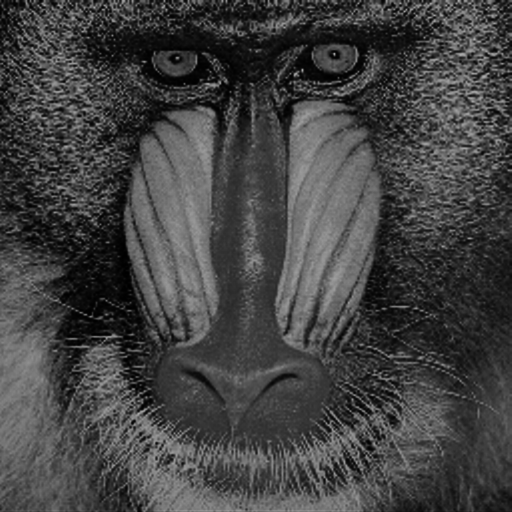

In [32]:
R = Float64.(image)
R = R .*sin.(R)
Gray.(R)

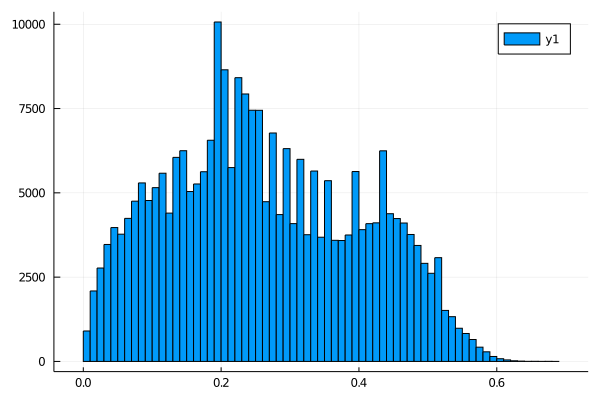

In [33]:
histogram(R[:])

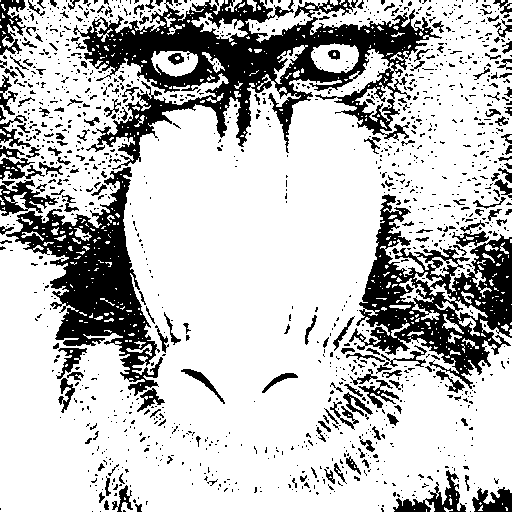

In [34]:
O = Float64.(image)
for (k,x) in enumerate(O)
    if O[k] < 0.4
        O[k] = 0
    elseif O[k] >= 0.4
        O[k] = 1
    end
end
Gray.(O)

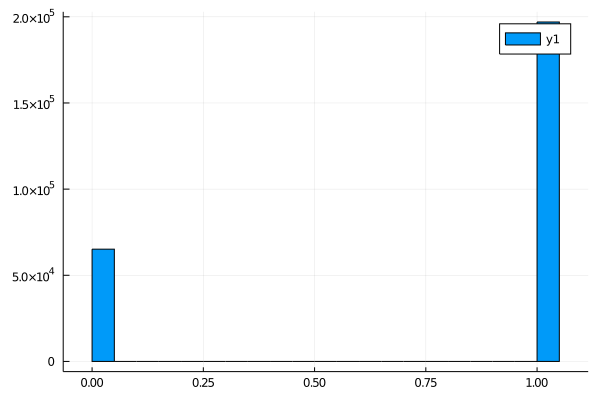

In [35]:
histogram(O[:])

In [43]:
function Laplasjan(image)
    A = copy(image)
    for i in 2:size(image,1)-1, j in 2:size(image,2)-1
        A[i,j] = image[i+1,j] + image[i-1,j] + image[i,j+1] + image[i,j-1] -4*image[i,j]
    end
    return Gray.(A)
end

Laplasjan (generic function with 1 method)

In [44]:
function Laplasjan_pion(image)
    A = copy(image)
    for i in 2:size(image,1)-1, j in 2:size(image,2)-1
        A[i,j] = image[i,j+1] + image[i,j-1] -2*image[i,j]
    end
    return Gray.(A)
end

Laplasjan_pion (generic function with 1 method)

In [45]:
function Laplasjan_poziom(image)
    A = copy(image)
    for i in 2:size(image,1)-1, j in 2:size(image,2)-1
        A[i,j] = image[i+1,j] + image[i-1,j] -2*image[i,j]
    end
    return Gray.(A)
end

Laplasjan_poziom (generic function with 1 method)

In [50]:
Test = testimage("fabio_gray_256")
R = Float64.(Test)

256×256 Array{Float64,2}:
 0.517647  0.494118  0.486275  0.466667  …  0.184314  0.184314  0.188235
 0.372549  0.34902   0.384314  0.368627     0.180392  0.184314  0.184314
 0.388235  0.360784  0.372549  0.364706     0.176471  0.180392  0.180392
 0.368627  0.341176  0.376471  0.372549     0.172549  0.176471  0.180392
 0.368627  0.345098  0.360784  0.356863     0.168627  0.176471  0.176471
 0.380392  0.360784  0.364706  0.364706  …  0.172549  0.176471  0.176471
 0.384314  0.372549  0.364706  0.364706     0.176471  0.180392  0.180392
 0.372549  0.360784  0.364706  0.372549     0.180392  0.184314  0.180392
 0.360784  0.368627  0.368627  0.368627     0.172549  0.172549  0.176471
 0.364706  0.376471  0.372549  0.372549     0.176471  0.176471  0.172549
 0.360784  0.368627  0.380392  0.376471  …  0.176471  0.176471  0.172549
 0.364706  0.364706  0.380392  0.376471     0.176471  0.172549  0.168627
 0.376471  0.384314  0.380392  0.376471     0.172549  0.168627  0.160784
 ⋮                       

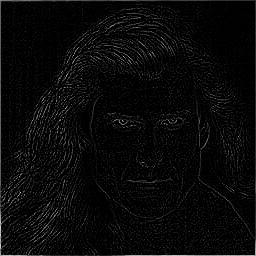

In [51]:
Laplasjan(R)

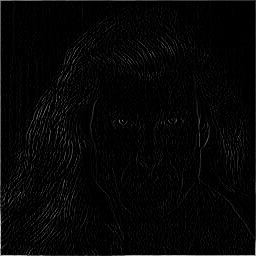

In [52]:
Laplasjan_pion(R)

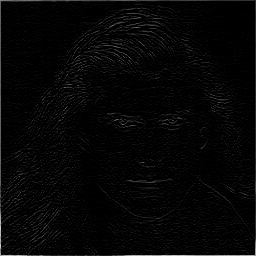

In [53]:
Laplasjan_poziom(R)

In [10]:
function srednia(image,size_s)
    for i in size_s+1:size(image,1)-size_s, j in size_s+1:size(image,2)-size_s
        image[i,j]=sum([image[k,l] for k in i-size_s:i+size_s,l in j-size_s:j+size_s])/((size_s*2+1)^2)
    end
    return image
end

srednia (generic function with 1 method)

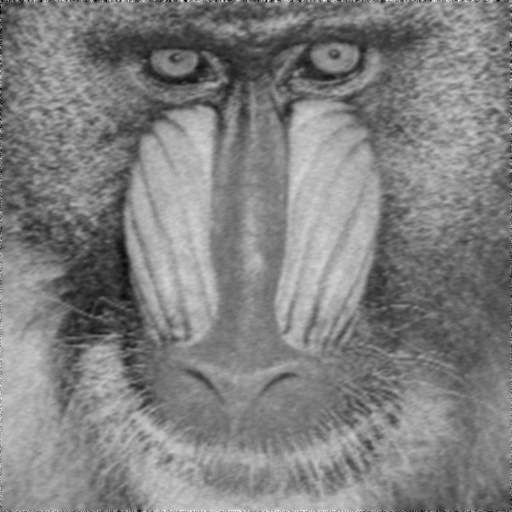

In [19]:
szum2 = I.+rand((-0.1,0.1),size(I))
V = srednia(szum2,2)
Gray.(V)

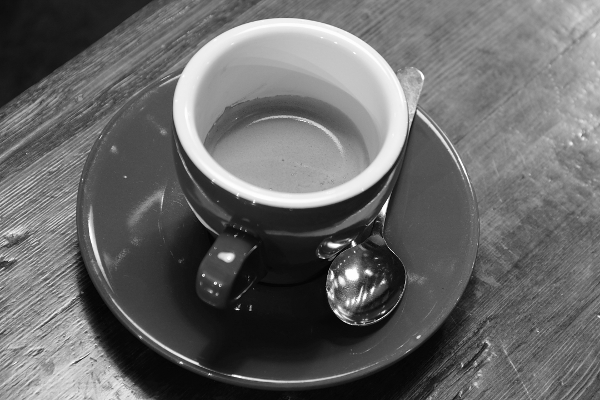

In [103]:
using Statistics
imag = testimage("coffe")
imagG=Gray.(imag)
B = Float64.(imagG)
Gray.(B)

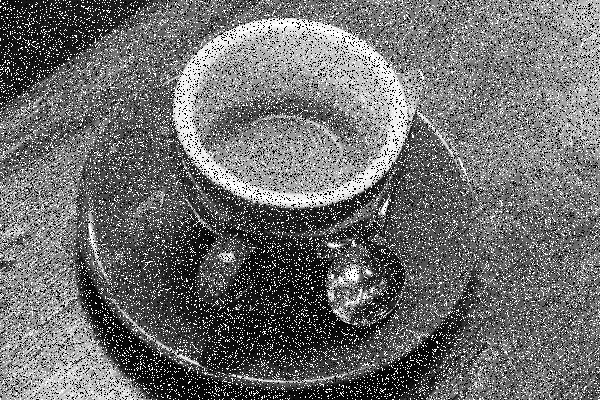

In [107]:
n,m = size(B)
B2 = B .+ rand((-1,1,0,0,0,0,0,0), n,m)
B3 = zeros(size(B))

for k in 2:n-1, j in 2:m-1
    B3[k,j] = mean(B2[k-1:k+1,j-1:j+1])
end

Gray.(B2)

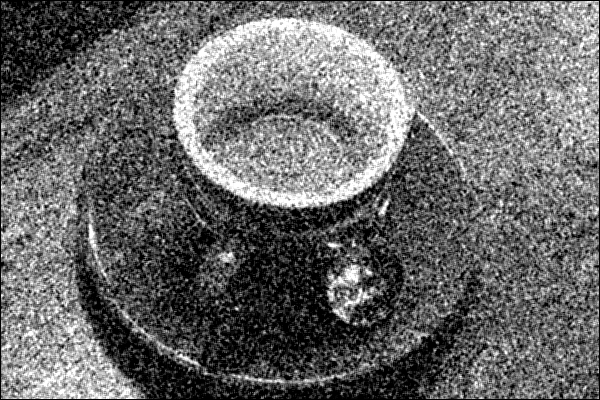

In [108]:
Gray.(B3)

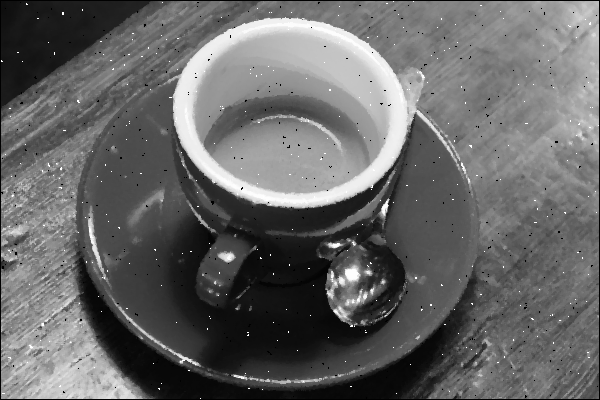

In [110]:
imag = testimage("coffe")
imagG=Gray.(imag)
N = Float64.(imagG)
Gray.(N)

n,m = size(N)
N2 = N .+ rand((-1,1,0,0,0,0,0,0), n,m)
N2[N2 .>= 1] .=1
N2[N2 .<= 0] .= 0
N3 = zeros(size(B))

for k in 2:n-1, j in 2:m-1
    N3[k,j] = median(N2[k-1:k+1,j-1:j+1])
end

Gray.(N3)